### HairCLIP

In [1]:
!pip install torchvision
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install tensorflow-io
!pip install Ninja
!pip install dlib
!pip install cog
!pip install gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.9 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-jxz0q9lt
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-jxz0q9lt
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=7c282441eac904d0983e0cd413f0f8153d72f17fde8e48d38a35167f66441f6b
  Stored in directory: /tmp/pip-ephem-wheel-cache-96bcb5ll/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.4-cp310-cp310-linux_x86_

In [2]:
import shutil
import os

# Define a function to remove a directory and its contents recursively
def remove_folder(folder_path):
    shutil.rmtree(folder_path)

# Example usage:
if os.path.exists('/kaggle/working/HairCLIP'):
    remove_folder('/kaggle/working/HairCLIP')
    
%cd /kaggle/working/
!git clone https://github.com/wty-ustc/HairCLIP.git

/kaggle/working
Cloning into 'HairCLIP'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 170 (delta 49), reused 153 (delta 40), pack-reused 0
Receiving objects: 100% (170/170), 40.34 MiB | 18.75 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [3]:
%cd /kaggle/working/HairCLIP

/kaggle/working/HairCLIP


In [4]:
!gdown --id '1pts5tkfAcWrg4TpLDu6ILF5wHID32Nzm' -O "/kaggle/working/HairCLIP/pretrained_models/stylegan2-ffhq-config-f.pt"
!gdown --id '1hqZT6ZMldhX3M_x378Sm4Z2HMYr-UwQ4' -O "/kaggle/working/HairCLIP/pretrained_models/hairclip.pt"
!gdown --id '1FS2V756j-4kWduGxfir55cMni5mZvBTv' -O "/kaggle/working/HairCLIP/pretrained_models/model_ir_se50.pth"
!wget -P /kaggle/working/HairCLIP/pretrained_models http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK
!bunzip2 /kaggle/working/HairCLIP/pretrained_models/shape_predictor_68_face_landmarks.dat.bz2

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1pts5tkfAcWrg4TpLDu6ILF5wHID32Nzm
From (redirected): https://drive.google.com/uc?id=1pts5tkfAcWrg4TpLDu6ILF5wHID32Nzm&confirm=t&uuid=596b9f37-8703-47d5-89b7-d2c269192c1a
To: /kaggle/working/HairCLIP/pretrained_models/stylegan2-ffhq-config-f.pt
100%|████████████████████████████████████████| 381M/381M [00:13<00:00, 27.6MB/s]
/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1hqZT6ZMldhX3M_x378Sm4Z2HMYr-UwQ4
From (redirected): https://drive.google.com/uc?id=1hqZT6ZMldhX3M_x378Sm4Z

### FS_encoder

In [5]:
if os.path.exists('/kaggle/working/FeatureStyleEncoder'):
    remove_folder('/kaggle/working/FeatureStyleEncoder')
    
%cd /kaggle/working/
!git clone https://github.com/InterDigitalInc/FeatureStyleEncoder.git

/kaggle/working
Cloning into 'FeatureStyleEncoder'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 129 (delta 10), reused 8 (delta 8), pack-reused 114
Receiving objects: 100% (129/129), 24.13 MiB | 21.50 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [6]:
!pip install face_alignment

In [7]:
%cd FeatureStyleEncoder

%mkdir pretrained_models
%cd pretrained_models

# download pretrained encoder
!gdown --fuzzy https://drive.google.com/file/d/1RnnBL77j_Can0dY1KOiXHvG224MxjvzC/view?usp=sharing

# download arcface pretrained model
!gdown --fuzzy https://drive.google.com/file/d/1coFTz-Kkgvoc_gRT8JFzqCgeC3lAFWQp/view?usp=sharing

# download face parsing model from https://github.com/zllrunning/face-parsing.PyTorch
!gdown --fuzzy https://drive.google.com/open?id=154JgKpzCPW82qINcVieuPH3fZ2e0P812
    
# download pSp pretrained model from https://github.com/eladrich/pixel2style2pixel.git
%cd ../pixel2style2pixel
!mkdir pretrained_models

%cd pretrained_models
!gdown --fuzzy https://drive.google.com/file/d/1bMTNWkh5LArlaWSc_wa8VKyq2V42T2z0/view?usp=sharing

/kaggle/working/FeatureStyleEncoder
/kaggle/working/FeatureStyleEncoder/pretrained_models
Downloading...
From (original): https://drive.google.com/uc?id=1RnnBL77j_Can0dY1KOiXHvG224MxjvzC
From (redirected): https://drive.google.com/uc?id=1RnnBL77j_Can0dY1KOiXHvG224MxjvzC&confirm=t&uuid=b85e4c46-c751-4ca0-a78f-2ce408b84bf5
To: /kaggle/working/FeatureStyleEncoder/pretrained_models/143_enc.pth
100%|████████████████████████████████████████| 456M/456M [00:14<00:00, 32.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1coFTz-Kkgvoc_gRT8JFzqCgeC3lAFWQp
From (redirected): https://drive.google.com/uc?id=1coFTz-Kkgvoc_gRT8JFzqCgeC3lAFWQp&confirm=t&uuid=e9802b9a-88de-40ca-9cbc-2b1283d0f043
To: /kaggle/working/FeatureStyleEncoder/pretrained_models/backbone.pth
100%|████████████████████████████████████████| 175M/175M [00:05<00:00, 30.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=154JgKpzCPW82qINcVieuPH3fZ2e0P812
To: /kaggle/working/FeatureStyleEncoder/pretrained_mode

# latent_dataset.py

In [8]:
%cd /kaggle/working/HairCLIP

/kaggle/working/HairCLIP


In [9]:
from torch.utils.data import Dataset
import numpy as np
import clip
import torch
import random
import sys
from PIL import Image
import torchvision.transforms as transforms
sys.path.insert(0, "/kaggle/working/HairCLIP/mapper")
from mapper.training import train_utils
import os

In [10]:
class LatentsDataset(Dataset):

    def __init__(self, latents, features, opts, status='train'):
        self.latents = latents
        self.features = features
        self.opts = opts
        self.status = status
        assert (self.opts.hairstyle_manipulation_prob+self.opts.color_manipulation_prob+self.opts.both_manipulation_prob) <= 1
        with open(self.opts.hairstyle_description, "r") as fd:
            self.hairstyle_description_list = fd.read().splitlines()

        self.hairstyle_list = [single_hairstyle_description[:-9] for single_hairstyle_description in self.hairstyle_description_list]
        self.color_list = [single_color_description.strip()+' ' for single_color_description in self.opts.color_description.split(',')]
        self.image_transform = transforms.Compose([transforms.Resize((1024, 1024)), transforms.ToTensor(),transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
        if self.status == 'train':
            self.out_domain_hairstyle_img_path_list = sorted(train_utils.make_dataset(self.opts.hairstyle_ref_img_train_path))
            self.out_domain_color_img_path_list = sorted(train_utils.make_dataset(self.opts.color_ref_img_train_path))
        else:
            self.out_domain_hairstyle_img_path_list = sorted(train_utils.make_dataset(self.opts.hairstyle_ref_img_test_path))
            self.out_domain_color_img_path_list = sorted(train_utils.make_dataset(self.opts.color_ref_img_test_path))


In [11]:
def manipulate_hairstyle(self, index):
    color_text_embedding = torch.Tensor([0])
    color_tensor = torch.Tensor([0])
    if random.random() < self.opts.hairstyle_text_manipulation_prob:
        selected_hairstyle_description = np.random.choice(self.hairstyle_list)+'hairstyle'
        selected_description = selected_hairstyle_description
        hairstyle_text_embedding = torch.cat([clip.tokenize(selected_hairstyle_description)])[0]
        hairstyle_tensor = torch.Tensor([0])
    else:
        hairstyle_text_embedding = torch.Tensor([0])
        img_pil = Image.open(random.choice(self.out_domain_hairstyle_img_path_list))
        hairstyle_tensor = self.image_transform(img_pil)
        selected_description = 'hairstyle_out_domain_ref'
    return self.latents[index], self.features[index], hairstyle_text_embedding, color_text_embedding, selected_description, hairstyle_tensor, color_tensor

# Attach the function to the class
LatentsDataset.manipulate_hairstyle = manipulate_hairstyle

In [12]:
def manipulater_color(self, index):
    hairstyle_text_embedding = torch.Tensor([0])
    hairstyle_tensor = torch.Tensor([0])
    selected_color_description = np.random.choice(self.color_list)+'hair'
    if random.random() < self.opts.color_text_manipulation_prob:
        selected_description = selected_color_description
        color_text_embedding = torch.cat([clip.tokenize(selected_color_description)])[0]
        color_tensor = torch.Tensor([0])
    else:
        color_text_embedding = torch.Tensor([0])
        if random.random() < (self.opts.color_in_domain_ref_manipulation_prob/(1-self.opts.color_text_manipulation_prob)):
            selected_description = 'color_in_domain_ref'
            img_pil = Image.open(self.opts.color_ref_img_in_domain_path+selected_color_description+'/'+str(random.randint(0, (self.opts.num_for_each_augmented_color-1))).zfill(5)+'.jpg')
            color_tensor = self.image_transform(img_pil)
        else:
            selected_description = 'color_out_domain_ref'
            img_pil = Image.open(random.choice(self.out_domain_color_img_path_list))
            color_tensor = self.image_transform(img_pil)
    return self.latents[index], self.features[index], hairstyle_text_embedding, color_text_embedding, selected_description, hairstyle_tensor, color_tensor

# Attach the function to the class
LatentsDataset.manipulater_color = manipulater_color

In [13]:
def manipulater_hairstyle_and_color(self, index):
    returned_latent, returned_features, hairstyle_text_embedding, _, selected_hairstyle_description, hairstyle_tensor, _ = self.manipulate_hairstyle(index)
    _, _, _, color_text_embedding, selected_color_description, _, color_tensor = self.manipulater_color(index)
    selected_description = f'{selected_hairstyle_description}-{selected_color_description}'
    return returned_latent, returned_features, hairstyle_text_embedding, color_text_embedding, selected_description, hairstyle_tensor, color_tensor

# Attach the function to the class
LatentsDataset.manipulater_hairstyle_and_color = manipulater_hairstyle_and_color

In [14]:
def no_editing(self, index):
    return self.latents[index], self.features[index], torch.Tensor([0]), torch.Tensor([0]), 'no_editing', torch.Tensor([0]), torch.Tensor([0])

# Attach the function to the class
LatentsDataset.no_editing = no_editing

In [15]:
def __len__(self):
    return self.latents.shape[0]

# Attach the function to the class
LatentsDataset.__len__ = __len__

In [16]:
def __getitem__(self, index):
    function_list = ['self.manipulate_hairstyle(index)', 'self.manipulater_color(index)', 'self.manipulater_hairstyle_and_color(index)', 'self.no_editing(index)']
    prob_array = np.array([self.opts.hairstyle_manipulation_prob, self.opts.color_manipulation_prob, self.opts.both_manipulation_prob, (1-self.opts.hairstyle_manipulation_prob-self.opts.color_manipulation_prob-self.opts.both_manipulation_prob)])
    return eval(np.random.choice(function_list, replace=False, p=prob_array.ravel()))

# Attach the function to the class
LatentsDataset.__getitem__ = __getitem__

# image_embedding_loss.py

In [17]:
import torch
import clip
import torchvision.transforms as transforms

class ImageEmbddingLoss(torch.nn.Module):

    def __init__(self):
        super(ImageEmbddingLoss, self).__init__()
        self.model, _ = clip.load("ViT-B/32", device="cuda")
        self.transform = transforms.Compose([transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))])
        self.face_pool = torch.nn.AdaptiveAvgPool2d((224, 224))
        self.cosloss = torch.nn.CosineEmbeddingLoss()

    def forward(self, masked_generated, masked_img_tensor):
#         print(f'masked_generated: {masked_generated.shape}, masked_img_tensor: {masked_img_tensor.shape}')
        
        masked_generated = self.face_pool(masked_generated)
#         print(f'masked_generated: {masked_generated.shape}')
              
        masked_generated_renormed = self.transform(masked_generated * 0.5 + 0.5)
#         print(f'masked_generated_renormed: {masked_generated_renormed.shape}')

        masked_generated_feature = self.model.encode_image(masked_generated_renormed)
#         print(f'masked_generated_feature: {masked_generated_feature.shape}')

        masked_img_tensor = self.face_pool(masked_img_tensor)
#         print(f'masked_img_tensor: {masked_img_tensor.shape}')

        masked_img_tensor_renormed = self.transform(masked_img_tensor * 0.5 + 0.5)
#         print(f'masked_img_tensor_renormed: {masked_img_tensor_renormed.shape}')
        
        masked_img_tensor_feature = self.model.encode_image(masked_img_tensor_renormed)
#         print(f'masked_img_tensor_feature: {masked_img_tensor_feature.shape}')
              
        cos_target = torch.ones((masked_img_tensor.shape[0])).float().cuda()
        similarity = self.cosloss(masked_generated_feature, masked_img_tensor_feature, cos_target).unsqueeze(0).unsqueeze(0)
        return similarity


# coach.py

In [18]:
%cd /kaggle/working/HairCLIP

/kaggle/working/HairCLIP


In [19]:
import os
import sys
import clip
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from criteria.parse_related_loss import bg_loss, average_lab_color_loss
import criteria.clip_loss as clip_loss
# import criteria.image_embedding_loss as image_embedding_loss
from criteria import id_loss

# sys.path.insert(0, "mapper")
# from mapper.datasets.latents_dataset import LatentsDataset
from mapper.hairclip_mapper import HairCLIPMapper
from mapper.training.ranger import Ranger
from mapper.training import train_utils

2024-05-04 03:14:56.827591: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 03:14:56.827706: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 03:14:56.965255: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
class Coach:
    def __init__(self, opts):
        self.opts = opts
        self.global_step = 0
        self.device = 'cuda:0'
        self.opts.device = self.device

        # Initialize network
        self.net = HairCLIPMapper(self.opts).to(self.device)

        # Initialize loss
        self.id_loss = id_loss.IDLoss(self.opts).to(self.device).eval()
        self.clip_loss = clip_loss.CLIPLoss(opts)
        self.latent_l2_loss = nn.MSELoss().to(self.device).eval()
        self.background_loss = bg_loss.BackgroundLoss(self.opts).to(self.device).eval()
        self.image_embedding_loss = ImageEmbddingLoss()
        self.average_color_loss = average_lab_color_loss.AvgLabLoss(self.opts).to(self.device).eval()
        self.maintain_color_for_hairstyle_loss = average_lab_color_loss.AvgLabLoss(self.opts).to(self.device).eval()

        # Initialize optimizer
        self.optimizer = self.configure_optimizers()

        # Initialize dataset
        self.train_dataset, self.test_dataset = self.configure_datasets()
        self.train_dataloader = DataLoader(self.train_dataset,
                                           batch_size=self.opts.batch_size,
                                           shuffle=True,
                                           num_workers=int(self.opts.workers),
                                           drop_last=True)
        self.test_dataloader = DataLoader(self.test_dataset,
                                          batch_size=self.opts.test_batch_size,
                                          shuffle=False,
                                          num_workers=int(self.opts.test_workers),
                                          drop_last=True)



        # Initialize logger
        log_dir = os.path.join(opts.exp_dir, 'logs')
        os.makedirs(log_dir, exist_ok=True)
        self.log_dir = log_dir
        self.logger = SummaryWriter(log_dir=log_dir)

        # Initialize checkpoint dir
        self.checkpoint_dir = os.path.join(opts.exp_dir, 'checkpoints')
        os.makedirs(self.checkpoint_dir, exist_ok=True)
        self.best_val_loss = None
        if self.opts.save_interval is None:
            self.opts.save_interval = self.opts.max_steps

In [21]:
def train(self):
    self.net.train()
    while self.global_step < self.opts.max_steps:
        for batch_idx, batch in enumerate(self.train_dataloader):
            self.optimizer.zero_grad()
            w, Feature, hairstyle_text_inputs, color_text_inputs, selected_description_tuple, hairstyle_tensor, color_tensor = batch
            selected_description = ''
            for item in selected_description_tuple:
                selected_description+=item

            w = w.to(self.device)
            Feature = Feature.to(self.device)
            hairstyle_text_inputs = hairstyle_text_inputs.to(self.device)
            color_text_inputs = color_text_inputs.to(self.device)
            hairstyle_tensor = hairstyle_tensor.to(self.device)
            color_tensor = color_tensor.to(self.device)
            
            with torch.no_grad():
                features = [None]*5 + [Feature] + [None]*(17-5)
                x, _ = trainer.StyleGAN([w], 
                                        input_is_latent=True, 
                                        randomize_noise=False, 
                                        features_in=features, 
                                        feature_scale=min(1.0, 0.0001*1e5))
            
            if hairstyle_tensor.shape[1] != 1:
                hairstyle_tensor_hairmasked = hairstyle_tensor * self.average_color_loss.gen_hair_mask(hairstyle_tensor)
            else:
                hairstyle_tensor_hairmasked = torch.Tensor([0]).unsqueeze(0).cuda()
            if color_tensor.shape[1] != 1:
                color_tensor_hairmasked = color_tensor * self.average_color_loss.gen_hair_mask(color_tensor)
            else:
                color_tensor_hairmasked = torch.Tensor([0]).unsqueeze(0).cuda()
            
            w_hat = w + 0.1 * self.net.mapper(w, 
                                              hairstyle_text_inputs, 
                                              color_text_inputs, 
                                              hairstyle_tensor_hairmasked, 
                                              color_tensor_hairmasked)
            
            # calculate delta feature
            _, fea_0 = trainer.StyleGAN([w], input_is_latent=True, return_features=True)
            _, fea_1 = trainer.StyleGAN([w_hat], input_is_latent=True, return_features=True)
            
            features = [None]*5 + [Feature + fea_1[5] - fea_0[5]] + [None]*(17-5)
            x_hat, _ = trainer.StyleGAN([w_hat], 
                                        input_is_latent=True, 
                                        features_in=features, 
                                        feature_scale=1.0)

            loss, loss_dict = self.calc_loss(w, x, w_hat, x_hat, hairstyle_text_inputs, color_text_inputs, hairstyle_tensor, color_tensor, selected_description)
            loss.backward()
            self.optimizer.step()

            # Logging related
            if self.global_step % self.opts.image_interval == 0 or (
                    self.global_step < 1000 and self.global_step % 1000 == 0):
                if (hairstyle_tensor.shape[1] != 1) and (color_tensor.shape[1] != 1):
                    img_tensor = torch.cat([hairstyle_tensor, color_tensor], dim = 3)
                elif hairstyle_tensor.shape[1] != 1:
                    img_tensor = hairstyle_tensor
                elif color_tensor.shape[1] != 1:
                    img_tensor = color_tensor
                else:
                    img_tensor = None
                self.parse_and_log_images(x, x_hat, img_tensor, title='images_train', selected_description=selected_description)
            if self.global_step % self.opts.board_interval == 0:
                self.print_metrics(loss_dict, prefix='train', selected_description=selected_description)
                self.log_metrics(loss_dict, prefix='train')

            # Validation related
            val_loss_dict = None
            if self.global_step % self.opts.val_interval == 0 or self.global_step == self.opts.max_steps:
                val_loss_dict = self.validate()
                if val_loss_dict and (self.best_val_loss is None or val_loss_dict['loss'] < self.best_val_loss):
                    self.best_val_loss = val_loss_dict['loss']
                    self.checkpoint_me(val_loss_dict, is_best=True)

            if self.global_step % self.opts.save_interval == 0 or self.global_step == self.opts.max_steps:
                if val_loss_dict is not None:
                    self.checkpoint_me(val_loss_dict, is_best=False)
                else:
                    self.checkpoint_me(loss_dict, is_best=False)

            if self.global_step == self.opts.max_steps:
                print('OMG, finished training!', flush=True)
                break

            self.global_step += 1
            
# Attach the function to the class
Coach.train = train

In [22]:
def validate(self):
    self.net.eval()
    agg_loss_dict = []
    for batch_idx, batch in enumerate(self.test_dataloader):
        if batch_idx > 200:
            break

        w, Feature, hairstyle_text_inputs, color_text_inputs, selected_description_tuple, hairstyle_tensor, color_tensor = batch
        selected_description = ''
        for item in selected_description_tuple:
            selected_description+=item

        with torch.no_grad():
            w = w.to(self.device).float()
            Feature = Feature.to(self.device).float()
            hairstyle_text_inputs = hairstyle_text_inputs.to(self.device)
            color_text_inputs = color_text_inputs.to(self.device)
            hairstyle_tensor = hairstyle_tensor.to(self.device)
            color_tensor = color_tensor.to(self.device)
            
            features = [None]*5 + [Feature] + [None]*(17-5)
            x, _ = trainer.StyleGAN([w], 
                                    input_is_latent=True, 
                                    randomize_noise=False, 
                                    features_in=features, 
                                    feature_scale=min(1.0, 0.0001*1e5))
            
            if hairstyle_tensor.shape[1] != 1:
                hairstyle_tensor_hairmasked = hairstyle_tensor * self.average_color_loss.gen_hair_mask(hairstyle_tensor)
            else:
                hairstyle_tensor_hairmasked = torch.Tensor([0]).unsqueeze(0).cuda()
            if color_tensor.shape[1] != 1:
                color_tensor_hairmasked = color_tensor * self.average_color_loss.gen_hair_mask(color_tensor)
            else:
                color_tensor_hairmasked = torch.Tensor([0]).unsqueeze(0).cuda()
            
            w_hat = w + 0.1 * self.net.mapper(w, 
                                              hairstyle_text_inputs, 
                                              color_text_inputs, 
                                              hairstyle_tensor_hairmasked, 
                                              color_tensor_hairmasked)
            # calculate delta feature
            _, fea_0 = trainer.StyleGAN([w], input_is_latent=True, return_features=True)
            _, fea_1 = trainer.StyleGAN([w_hat], input_is_latent=True, return_features=True)
            
            features = [None]*5 + [Feature + fea_1[5] - fea_0[5]] + [None]*(17-5)
            x_hat, _ = trainer.StyleGAN([w_hat], 
                                        input_is_latent=True,
                                        features_in=features, 
                                        feature_scale=1.0)
            
            loss, cur_loss_dict = self.calc_loss(w, x, w_hat, x_hat, hairstyle_text_inputs, color_text_inputs, hairstyle_tensor, color_tensor, selected_description)
        agg_loss_dict.append(cur_loss_dict)

        # Logging related
        if (hairstyle_tensor.shape[1] != 1) and (color_tensor.shape[1] != 1):
            img_tensor = torch.cat([hairstyle_tensor, color_tensor], dim = 3)
        elif hairstyle_tensor.shape[1] != 1:
            img_tensor = hairstyle_tensor
        elif color_tensor.shape[1] != 1:
            img_tensor = color_tensor
        else:
            img_tensor = None
        self.parse_and_log_images(x, x_hat, img_tensor, title='images_val', selected_description=selected_description, index=batch_idx)

        # For first step just do sanity test on small amount of data
        if self.global_step == 0 and batch_idx >= 4:
            self.net.train()
            return None  # Do not log, inaccurate in first batch

    loss_dict = train_utils.aggregate_loss_dict(agg_loss_dict)
    self.log_metrics(loss_dict, prefix='test')
    self.print_metrics(loss_dict, prefix='test', selected_description=selected_description)

    self.net.train()
    return loss_dict

# Attach the function to the class 
Coach.validate = validate

In [23]:
def checkpoint_me(self, loss_dict, is_best):
    save_name = 'best_model.pt' if is_best else 'latest_model.pt'
    save_dict = self.__get_save_dict()
    checkpoint_path = os.path.join(self.checkpoint_dir, save_name)
    torch.save(save_dict, checkpoint_path)
    with open(os.path.join(self.checkpoint_dir, 'timestamp.txt'), 'a') as f:
        if is_best:
            f.write('**Best**: Step - {}, Loss - {:.3f} \n{}\n'.format(self.global_step, self.best_val_loss, loss_dict))
        else:
            f.write('Step - {}, \n{}\n'.format(self.global_step, loss_dict))

# Attach the function to the class
Coach.checkpoint_me = checkpoint_me

In [24]:
def configure_optimizers(self):
    params = list(self.net.mapper.parameters())
    if self.opts.optim_name == 'adam':
        optimizer = torch.optim.Adam(params, lr=self.opts.learning_rate)
    else:
        optimizer = Ranger(params, lr=self.opts.learning_rate)
    return optimizer

# Attach the function to the class
Coach.configure_optimizers = configure_optimizers

In [25]:
def configure_datasets(self):
#     latents_dir_path = "/kaggle/input/ffhq-inversion-by-fs-latent-codes-and-features/latents"
#     latents_dir = os.listdir(latents_dir_path)
    
#     features_dir_path = "/kaggle/input/ffhq-inversion-by-fs-latent-codes-and-features/features"
#     features_dir = os.listdir(features_dir_path)
    
#     latents = []
#     for latents_file in latents_dir:
#         latents_file_path = os.path.join(latents_dir_path, latents_file)
#         latent = torch.load(latents_file_path)
#         latents.append(latent)
    
#     features = []
#     for features_file in features_dir:
#         features_file_path = os.path.join(features_dir_path, features_file)
#         feature = torch.load(features_file_path)
#         features.append(feature)
    
#     latents = torch.cat(latents)
#     features = torch.cat(features)
#     train_latents = latents[:27000]
#     test_latents = latents[27000:]
#     train_features = features[:27000]
#     test_features = features[27000:]

    latents_file_path = "/kaggle/input/ffhq-inversion-by-fs-latent-codes-and-features/latents/latents10000.pt"
    latents = torch.load(latents_file_path)
    
    features_file_path = "/kaggle/input/ffhq-inversion-by-fs-latent-codes-and-features/features/features10000.pt"
    features = torch.load(features_file_path)
    
    train_latents = latents[:9000]
    test_latents = latents[9000:]
    train_features = features[:9000]
    test_features = features[9000:]
    
    train_dataset_ffhq = LatentsDataset(latents=train_latents.cpu(),
                                          features=train_features.cpu(),
                                          opts=self.opts,
                                          status='train')
    test_dataset_ffhq = LatentsDataset(latents=test_latents.cpu(),
                                         features=test_features.cpu(),
                                         opts=self.opts,
                                         status='test')
    train_dataset = train_dataset_ffhq
    test_dataset = test_dataset_ffhq
    print("Number of training samples: {}".format(len(train_dataset)), flush=True)
    print("Number of test samples: {}".format(len(test_dataset)), flush=True)
    return train_dataset, test_dataset

# Attach the function to the class
Coach.configure_datasets = configure_datasets

In [26]:
def calc_loss(self, w, x, w_hat, x_hat, hairstyle_text_inputs, color_text_inputs, hairstyle_tensor, color_tensor, selected_description):
    loss_dict = {}
    loss = 0.0
    if self.opts.id_lambda > 0:
        loss_id, sim_improvement = self.id_loss(x_hat, x)
        loss_dict['loss_id'] = float(loss_id)
        loss_dict['id_improve'] = float(sim_improvement)
        loss = loss_id * self.opts.id_lambda * self.opts.attribute_preservation_lambda

    if self.opts.text_manipulation_lambda > 0:
        if hairstyle_text_inputs.shape[1] != 1:
            loss_text_hairstyle = self.clip_loss(x_hat, hairstyle_text_inputs).mean()
            loss_dict['loss_text_hairstyle'] = float(loss_text_hairstyle)
            loss += loss_text_hairstyle * self.opts.text_manipulation_lambda
        if color_text_inputs.shape[1] != 1:
            loss_text_color = self.clip_loss(x_hat, color_text_inputs).mean()
            loss_dict['loss_text_color'] = float(loss_text_color)
            loss += loss_text_color * self.opts.text_manipulation_lambda

    if self.opts.image_hairstyle_lambda > 0:
        if hairstyle_tensor.shape[1] != 1:
            if 'hairstyle_out_domain_ref' in selected_description:
                loss_img_hairstyle = self.image_embedding_loss((x_hat * self.average_color_loss.gen_hair_mask(x_hat)), (hairstyle_tensor * self.average_color_loss.gen_hair_mask(hairstyle_tensor))).mean()
                loss_dict['loss_img_hairstyle'] = float(loss_img_hairstyle)
                loss += loss_img_hairstyle * self.opts.image_hairstyle_lambda * self.opts.image_manipulation_lambda

    if self.opts.image_color_lambda > 0:
        if color_tensor.shape[1] != 1:
            loss_img_color = self.average_color_loss(color_tensor, x_hat)
            loss_dict['loss_img_color'] = float(loss_img_color)
            loss += loss_img_color * self.opts.image_color_lambda * self.opts.image_manipulation_lambda

    if self.opts.maintain_color_lambda > 0:
        if ((hairstyle_tensor.shape[1] != 1) or (hairstyle_text_inputs.shape[1] != 1)) and (color_tensor.shape[1] == 1) and (color_text_inputs.shape[1] == 1):
            loss_maintain_color_for_hairstyle = self.maintain_color_for_hairstyle_loss(x, x_hat)
            loss_dict['loss_maintain_color_for_hairstyle'] = float(loss_maintain_color_for_hairstyle)
            loss += loss_maintain_color_for_hairstyle * self.opts.maintain_color_lambda * self.opts.attribute_preservation_lambda
    if self.opts.background_lambda > 0:
        loss_background = self.background_loss(x, x_hat)
        loss_dict['loss_background'] = float(loss_background)
        loss += loss_background * self.opts.background_lambda * self.opts.attribute_preservation_lambda
    if self.opts.latent_l2_lambda > 0:
        loss_l2_latent = self.latent_l2_loss(w_hat, w)
        loss_dict['loss_l2_latent'] = float(loss_l2_latent)
        loss += loss_l2_latent * self.opts.latent_l2_lambda * self.opts.attribute_preservation_lambda
    loss_dict['loss'] = float(loss)
    return loss, loss_dict

# Attach the function to the class
Coach.calc_loss = calc_loss

In [27]:
def log_metrics(self, metrics_dict, prefix):
    for key, value in metrics_dict.items():
        self.logger.add_scalar('{}/{}'.format(prefix, key), value, self.global_step)

# Attach the function to the class
Coach.log_metrics = log_metrics

In [28]:
def print_metrics(self, metrics_dict, prefix, selected_description):
    if prefix == 'train':
        print('Metrics for {}, step {}'.format(prefix, self.global_step), selected_description, flush=True)
    else:
        print('Metrics for {}, step {}'.format(prefix, self.global_step), flush=True)
    for key, value in metrics_dict.items():
        print('\t{} = '.format(key), value, flush=True)

# Attach the function to the class
Coach.print_metrics = print_metrics

In [29]:
def parse_and_log_images(self, x, x_hat, img_tensor, title, selected_description, index=None):
    if index is None:
        path = os.path.join(self.log_dir, title, f'{str(self.global_step).zfill(5)}-{selected_description}.jpg')
    else:
        path = os.path.join(self.log_dir, title, f'{str(self.global_step).zfill(5)}-{str(index).zfill(5)}-{selected_description}.jpg')
    os.makedirs(os.path.dirname(path), exist_ok=True)
    if img_tensor is not None:
        if img_tensor.shape[3] == 1024:
            torchvision.utils.save_image(torch.cat([x.detach().cpu(), x_hat.detach().cpu(), img_tensor.detach().cpu()]), path,
                                 normalize=True, scale_each=True, value_range=(-1, 1), nrow=3)
        elif img_tensor.shape[3] == 2048:
            torchvision.utils.save_image(torch.cat([x.detach().cpu(), x_hat.detach().cpu(), img_tensor[:,:,:,0:1024].detach().cpu(), img_tensor[:,:,:,1024::].detach().cpu()]), path,
                                 normalize=True, scale_each=True, value_range=(-1, 1), nrow=4)				
    else:
        torchvision.utils.save_image(torch.cat([x.detach().cpu(), x_hat.detach().cpu()]), path,
                                 normalize=True, scale_each=True, value_range=(-1, 1), nrow=2)				

# Attach the function to the class
Coach.parse_and_log_images = parse_and_log_images

In [30]:
def __get_save_dict(self):
    save_dict = {
        'state_dict': self.net.state_dict(),
        'opts': vars(self.opts)
    }
    return save_dict

# Attach the function to the class
Coach.__get_save_dict = __get_save_dict

# Load FS_model

In [31]:
%cd /kaggle/working/FeatureStyleEncoder

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import argparse
import glob
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import yaml

from PIL import Image
from tqdm import tqdm
from torchvision import transforms, utils
from utils.functions import *

from trainer import *

/kaggle/working/FeatureStyleEncoder


In [32]:
torch.backends.cudnn.enabled = True
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True
torch.autograd.set_detect_anomaly(True)
Image.MAX_IMAGE_PIXELS = None

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu') 

parser = argparse.ArgumentParser()
parser.add_argument('--config', type=str, default='001', help='Path to the config file.')
parser.add_argument('--pretrained_model_path', type=str, default='./pretrained_models/143_enc.pth', help='pretrained stylegan2 model')
parser.add_argument('--stylegan_model_path', type=str, default='./pixel2style2pixel/pretrained_models/psp_ffhq_encode.pt', help='pretrained stylegan2 model')
parser.add_argument('--arcface_model_path', type=str, default='./pretrained_models/backbone.pth', help='pretrained arcface model')
parser.add_argument('--parsing_model_path', type=str, default='./pretrained_models/79999_iter.pth', help='pretrained parsing model')
parser.add_argument('--log_path', type=str, default='./logs/', help='log file path')
parser.add_argument('--resume', action='store_true', help='resume from checkpoint')
parser.add_argument('--checkpoint', type=str, default='', help='checkpoint file path')
parser.add_argument('--checkpoint_noiser', type=str, default='', help='checkpoint file path')
parser.add_argument('--multigpu', type=bool, default=False, help='use multiple gpus')
parser.add_argument('--input_path', type=str, default='./test/', help='evaluation data file path')
parser.add_argument('--save_path', type=str, default='./', help='output data save path')
fs_opts = parser.parse_args([])

In [33]:
img_to_tensor = transforms.Compose([
    transforms.Resize((1024, 1024)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

config = yaml.load(open('./configs/' + fs_opts.config + '.yaml', 'r'), Loader=yaml.FullLoader)

# Initialize trainer
trainer = Trainer(config, fs_opts)
trainer.initialize(fs_opts.stylegan_model_path, fs_opts.arcface_model_path, fs_opts.parsing_model_path)  
trainer.to(device)

state_dict = torch.load(fs_opts.pretrained_model_path)#os.path.join(fs_opts.log_path, fs_opts.config + '/checkpoint.pth'))
trainer.enc.load_state_dict(torch.load(fs_opts.pretrained_model_path))
trainer.enc.eval()

print("Feature_style_encoder successfully loaded!")

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:15<00:00, 3.11MB/s]


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:06<00:00, 39.3MB/s] 


Loading model from: /kaggle/working/FeatureStyleEncoder/lpips/weights/v0.1/alex.pth
Feature_style_encoder successfully loaded!


# Train.py

In [34]:
import os
import json
import sys
import pprint

# sys.path.insert(0, "/kaggle/working/HairCLIP/mapper")
# from mapper.options.train_options import TrainOptions

## TrainOptions.py

In [35]:
%cd /kaggle/working/HairCLIP

/kaggle/working/HairCLIP


In [36]:
from argparse import ArgumentParser


class TrainOptions:

    def __init__(self):
        self.parser = ArgumentParser()
        self.initialize()

    def initialize(self):
        self.parser.add_argument('--exp_dir', default="/kaggle/working/experiment", type=str, help='Path to experiment output directory')
        self.parser.add_argument('--no_coarse_mapper', default=False, action="store_true")
        self.parser.add_argument('--no_medium_mapper', default=False, action="store_true")
        self.parser.add_argument('--no_fine_mapper', default=False, action="store_true")
        self.parser.add_argument('--latents_train_path', default="", type=str, help="The latents for the training")
        self.parser.add_argument('--latents_test_path', default="", type=str, help="The latents for the validation")

        self.parser.add_argument('--hairstyle_ref_img_train_path', default="/kaggle/input/celebahq-resized-256x256/celeba_hq_256", type=str, help="The hairstyle reference image for the training")
        self.parser.add_argument('--hairstyle_ref_img_test_path', default="/kaggle/input/celebahq-resized-256x256/celeba_hq_256", type=str, help="The hairstyle reference image for the validation")
        self.parser.add_argument('--color_ref_img_train_path', default="/kaggle/input/celebahq-resized-256x256/celeba_hq_256", type=str, help="The color reference image for the training")
        self.parser.add_argument('--color_ref_img_test_path', default="/kaggle/input/celebahq-resized-256x256/celeba_hq_256", type=str, help="The color reference image for the validation")
        self.parser.add_argument('--color_ref_img_in_domain_path', default="", type=str, help="The color reference image in domain for the augmentation")
        self.parser.add_argument('--num_for_each_augmented_color', default=4000, type=int, help='Number for each augmented color')

        self.parser.add_argument('--hairstyle_manipulation_prob', default=0.5, type=float, help='Probability of only manipulating the hairstyle')
        self.parser.add_argument('--color_manipulation_prob', default=0.2, type=float, help='Probability of only manipulating the color')
        self.parser.add_argument('--both_manipulation_prob', default=0.27, type=float, help='Probability of simultaneously manipulating hairstyle and color')

        self.parser.add_argument('--hairstyle_text_manipulation_prob', default=0.5, type=float, help='Probability of using text to manipulate hairstyle')
        self.parser.add_argument('--color_text_manipulation_prob', default=0.5, type=float, help='Probability of using text to manipulate color')
        self.parser.add_argument('--color_in_domain_ref_manipulation_prob', default=0, type=float, help='Probability of using in-domain reference image to manipulate color')

        self.parser.add_argument('--train_dataset_size', default=5000, type=int, help="Will be used only if no latents are given")
        self.parser.add_argument('--test_dataset_size', default=1000, type=int, help="Will be used only if no latents are given")

        self.parser.add_argument('--batch_size', default=1, type=int, help='Batch size for training')
        self.parser.add_argument('--test_batch_size', default=1, type=int, help='Batch size for testing and inference')
        self.parser.add_argument('--workers', default=4, type=int, help='Number of train dataloader workers')
        self.parser.add_argument('--test_workers', default=2, type=int, help='Number of test/inference dataloader workers')

        self.parser.add_argument('--learning_rate', default=0.0005, type=float, help='Optimizer learning rate')
        self.parser.add_argument('--optim_name', default='adam', type=str, help='Which optimizer to use')


        self.parser.add_argument('--text_manipulation_lambda', default=2.0, type=float, help='Text manipulation loss multiplier factor')
        self.parser.add_argument('--image_manipulation_lambda', default=1.0, type=float, help='Image manipulation loss multiplier factor')
        self.parser.add_argument('--attribute_preservation_lambda', default=1.0, type=float, help='Attribute preservation loss multiplier factor')


        self.parser.add_argument('--image_hairstyle_lambda', default=5.0, type=float, help='Image-based hairstyle manipulation loss multiplier factor')
        self.parser.add_argument('--image_color_lambda', default=0.02, type=float, help='Image-based color manipulation loss multiplier factor')

        self.parser.add_argument('--id_lambda', default=0.3, type=float, help='ID loss multiplier factor')
        self.parser.add_argument('--maintain_color_lambda', default=0.02, type=float, help='Color retention loss multiplier factor')
        self.parser.add_argument('--background_lambda', default=1, type=float, help='Background loss multiplier factor')
        self.parser.add_argument('--latent_l2_lambda', default=0.8, type=float, help='Latent L2 loss multiplier factor')

        self.parser.add_argument('--parsenet_weights', default='/kaggle/working/HairCLIP/pretrained_models/parsenet.pth', type=str, help='Path to Parsing model weights')
        self.parser.add_argument('--stylegan_weights', default='/kaggle/working/HairCLIP/pretrained_models/stylegan2-ffhq-config-f.pt', type=str, help='Path to StyleGAN model weights')
        self.parser.add_argument('--stylegan_size', default=1024, type=int)
        self.parser.add_argument('--ir_se50_weights', default='/kaggle/working/HairCLIP/pretrained_models/model_ir_se50.pth', type=str, help="Path to facial recognition network used in ID loss")
        self.parser.add_argument('--checkpoint_path', default="/kaggle/working/HairCLIP/pretrained_models/hairclip.pt", type=str, help='Path to HairCLIP model checkpoint')

        self.parser.add_argument('--max_steps', default=20_000, type=int, help='Maximum number of training steps')
        self.parser.add_argument('--image_interval', default=100, type=int, help='Interval for logging train images during training')
        self.parser.add_argument('--board_interval', default=50, type=int, help='Interval for logging metrics to tensorboard')
        self.parser.add_argument('--val_interval', default=2000, type=int, help='Validation interval')
        self.parser.add_argument('--save_interval', default=2000, type=int, help='Model checkpoint interval')

        self.parser.add_argument('--hairstyle_description', default="/kaggle/working/HairCLIP/mapper/hairstyle_list.txt", type=str, help='Hairstyle text prompt list')
        self.parser.add_argument('--color_description', default = "purple, red, orange, yellow, green, blue, gray, brown, black, white, blond, pink", type=str, help='Color text prompt, eg: purple, red, orange')


    def parse(self):
        opts = self.parser.parse_args([])
        return opts

In [37]:
opts = TrainOptions().parse()
if opts.batch_size != 1 or opts.test_batch_size != 1:
    raise Exception('This version only supports batch size and test batch size to be 1.')

In [38]:
import shutil
def remove_folder(folder_path):
    shutil.rmtree(folder_path)

if os.path.exists("/kaggle/working/experiment"):
    remove_folder("/kaggle/working/experiment")

In [39]:
if os.path.exists(opts.exp_dir):
    raise Exception('Oops... {} already exists'.format(opts.exp_dir))
    
os.makedirs(opts.exp_dir, exist_ok=True)

opts_dict = vars(opts)
pprint.pprint(opts_dict)
with open(os.path.join(opts.exp_dir, 'opt.json'), 'w') as f:
    json.dump(opts_dict, f, indent=4, sort_keys=True)

coach = Coach(opts)

{'attribute_preservation_lambda': 1.0,
 'background_lambda': 10,
 'batch_size': 1,
 'board_interval': 50,
 'both_manipulation_prob': 0.27,
 'checkpoint_path': '/kaggle/working/HairCLIP/pretrained_models/hairclip.pt',
 'color_description': 'purple, red, orange, yellow, green, blue, gray, brown, '
                      'black, white, blond, pink',
 'color_in_domain_ref_manipulation_prob': 0,
 'color_manipulation_prob': 0.2,
 'color_ref_img_in_domain_path': '',
 'color_ref_img_test_path': '/kaggle/input/celebahq-resized-256x256/celeba_hq_256',
 'color_ref_img_train_path': '/kaggle/input/celebahq-resized-256x256/celeba_hq_256',
 'color_text_manipulation_prob': 0.5,
 'exp_dir': '/kaggle/working/experiment',
 'hairstyle_description': '/kaggle/working/HairCLIP/mapper/hairstyle_list.txt',
 'hairstyle_manipulation_prob': 0.5,
 'hairstyle_ref_img_test_path': '/kaggle/input/celebahq-resized-256x256/celeba_hq_256',
 'hairstyle_ref_img_train_path': '/kaggle/input/celebahq-resized-256x256/celeba_hq_

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 127MiB/s]


Loading from checkpoint: /kaggle/working/HairCLIP/pretrained_models/hairclip.pt
Loading ResNet ArcFace for ID Loss
Loading UNet for Background Loss
Loading UNet for AvgLabLoss
Loading UNet for AvgLabLoss
Number of training samples: 9000
Number of test samples: 1000


### Check dataloader shape

In [40]:
# coach = Coach(opts)
w, Feature, hairstyle_text_inputs, color_text_inputs, selected_description_tuple, hairstyle_tensor, color_tensor = next(iter(coach.train_dataloader))
print(w.shape)
print(Feature.shape)
print(hairstyle_text_inputs.shape)
print(color_text_inputs.shape)
print(selected_description_tuple) 
print(hairstyle_tensor.shape)
print(color_tensor.shape)

torch.Size([1, 18, 512])
torch.Size([1, 512, 16, 16])
torch.Size([1, 1])
torch.Size([1, 1])
('no_editing',)
torch.Size([1, 1])
torch.Size([1, 1])


In [ ]:
w, Feature, hairstyle_text_inputs, color_text_inputs, selected_description_tuple, hairstyle_tensor, color_tensor = next(iter(coach.test_dataloader))
print(w.shape)
print(Feature.shape)
print(hairstyle_text_inputs.shape)
print(color_text_inputs.shape)
print(selected_description_tuple) 
print(hairstyle_tensor.shape)
print(color_tensor.shape)

### Check propagation

In [41]:
with torch.no_grad():
    for batch_idx, batch in enumerate(coach.test_dataloader):
#         w, Feature, hairstyle_text_inputs, color_text_inputs, selected_description_tuple, hairstyle_tensor, color_tensor = batch
        selected_description = ''
        for item in selected_description_tuple:
            selected_description+=item

        w = w.to(coach.device).float()
        Feature = Feature.to(coach.device).float()
        hairstyle_text_inputs = hairstyle_text_inputs.to(coach.device)
        color_text_inputs = color_text_inputs.to(coach.device)
        hairstyle_tensor = hairstyle_tensor.to(coach.device)
        color_tensor = color_tensor.to(coach.device)

        
        features = [None]*5 + [Feature] + [None]*(17-5)
        x, _ = trainer.StyleGAN([w], 
                                input_is_latent=True, 
                                randomize_noise=False, 
                                features_in=features, 
                                feature_scale=min(1.0, 0.0001*1e5))
        
        if hairstyle_tensor.shape[1] != 1:
            hairstyle_tensor_hairmasked = hairstyle_tensor * coach.average_color_loss.gen_hair_mask(hairstyle_tensor)
        else:
            hairstyle_tensor_hairmasked = torch.Tensor([0]).unsqueeze(0).cuda()
        if color_tensor.shape[1] != 1:
            color_tensor_hairmasked = color_tensor * coach.average_color_loss.gen_hair_mask(color_tensor)
        else:
            color_tensor_hairmasked = torch.Tensor([0]).unsqueeze(0).cuda()
            
        w_hat = w + 0.1 * coach.net.mapper(w, 
                                          hairstyle_text_inputs, 
                                          color_text_inputs, 
                                          hairstyle_tensor_hairmasked, 
                                          color_tensor_hairmasked)
        # calculate delta feature
        _, fea_0 = trainer.StyleGAN([w], input_is_latent=True, return_features=True)
        _, fea_1 = trainer.StyleGAN([w_hat], input_is_latent=True, return_features=True)

        features = [None]*5 + [Feature + fea_1[5] - fea_0[5]] + [None]*(17-5)
        x_hat, _ = trainer.StyleGAN([w_hat], 
                                    input_is_latent=True,
                                    features_in=features, 
                                    feature_scale=1.0)
        
        break

In [42]:
print(w.shape)
print(w_hat.shape)
print(x.shape)
print(x_hat.shape)

torch.Size([1, 18, 512])
torch.Size([1, 18, 512])
torch.Size([1, 3, 1024, 1024])
torch.Size([1, 3, 1024, 1024])


In [44]:
x.shape

torch.Size([1, 3, 1024, 1024])

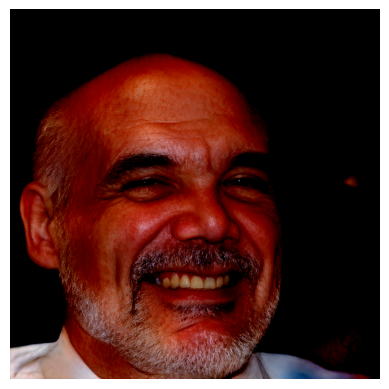

In [ ]:
# plt.imshow(x.cpu().squeeze().permute(1,2,0))
# plt.axis('off')  # Turn off axis labels
# plt.show()

### Train

In [ ]:
coach.train()